---
title: "Location data visualization on Map using Python"
author: "Pankaj Chejara"
date: "2023-09-23"
categories: [python, geopandas, map]
image: "./images/map_vis/map.png"
code-block-background: true
highlight-style: "arrow"
toc: true
---
# First time plotting coordintes on Map using Python 

This tutorial will show you how to work with geospatial data using Python with library geoPandas. For this exercise, I have used Boston Bike Sharing dataset which is available here. 
I have recently started learning and using Map library with Python and this tutorial is the reflection of things I have learned so far. I hope it will be helpful for those learning the same first time.

## Loading the dataset
We start first loading our dataset. There are two CSV files, `hubway_trips.csv` and `hubway_station.csv`. The first data file contains information all bike trips (e.g., bike number, start and end time of the trip, start and end station of the trip, user information, etc). The second data file `hubway_station.csv` contains information about the bike stations (e.g., longitude, lattitude, municipality).


In [6]:
import pandas as pd

# Bike trip data
trips = pd.read_csv('hubway_trips.csv')
trips.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


In [9]:
# Bike station data [seperator in this file is ';']
stations = pd.read_csv('hubway_stations.csv',sep=';')
stations.head()

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


## Joining the data
We will first join the data to have a single file with lattitude and longitude information for start station of bike trip.
For that we will perform join operation on `start_statn` in trips and `id` in stations.

In [62]:
# we exclude status column because it is present in both data file and will cause an error on join operation.
stations_non_status = stations[['id','lat','lng','station','municipal']]

# combined data with start station geo spatial information
trips_stations = trips.join(stations_non_status.set_index('id'),on='strt_statn')

trips_stations = trips_stations.loc[trips_stations['municipal'] == 'Boston',:]

In [61]:
trips_stations.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,lat,lng,station,municipal,geometry
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,42.359677,-71.059364,Mayor Thomas M. Menino - Government Center,Boston,POINT (-71.05936 42.35968)
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,42.359677,-71.059364,Mayor Thomas M. Menino - Government Center,Boston,POINT (-71.05936 42.35968)
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,42.359677,-71.059364,Mayor Thomas M. Menino - Government Center,Boston,POINT (-71.05936 42.35968)
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,42.359677,-71.059364,Mayor Thomas M. Menino - Government Center,Boston,POINT (-71.05936 42.35968)
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,42.359677,-71.059364,Mayor Thomas M. Menino - Government Center,Boston,POINT (-71.05936 42.35968)


## Working with GeoPandas library
Now we will move towards setting up our dataset to have geospatial data required by GeoPandas library. GeoPandas is a python library with extends capability of Pandas by including GeoSpatial data processing and plotting functionality.

First install GeoPandas library if you don't have it on your computer.

In [22]:
# Installing Geopandas
#! pip3 install geopandas

In [21]:
import geopandas as gpd
from shapely import Point, Polygon

In [63]:
geo_column = [Point(lng,lat) for lng, lat in zip(trips_stations['lng'],trips_stations['lat'])]

What we did in above code was created a list with a `Point` object for each record in our joined data file. This `Point` object will provide geospatial data information to GeoPandas to work with.

Now we will create our GeoPandas dataframe which will have our data with geospatial information.

In [68]:
crs={'init':'epsg:4326'}
gdf = gpd.GeoDataFrame(trips_stations,crs=crs,geometry=geo_column)

Now, we created a geopandas dataframe which have all our records from `trips_stations` dataframe and all those records are associated with a geometric point (e.g., geospatial data).

Each geopandas dataframe requires one geometry column which has information of geospatial data.

## Plot Geospatial data 

<AxesSubplot:>

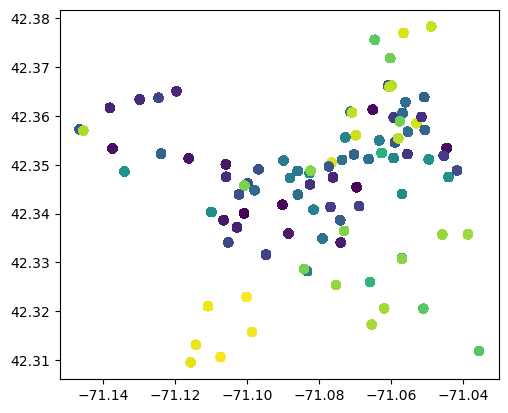

In [65]:
gdf.plot('strt_statn')

The above plot does not show Boston's map. In order to do that we would need Map files for Boston.

/Users/htk/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

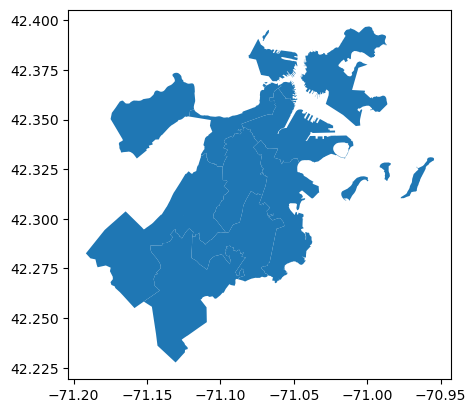

In [66]:
boston = gpd.read_file('./City_of_Boston_Boundary/')
boston = boston.to_crs({'init': 'epsg:4326'})
boston.plot()

## Plotting geospatial data over Boston's map
Now we will plot the data of start station of bike trip on the map of Boston.

<AxesSubplot:>

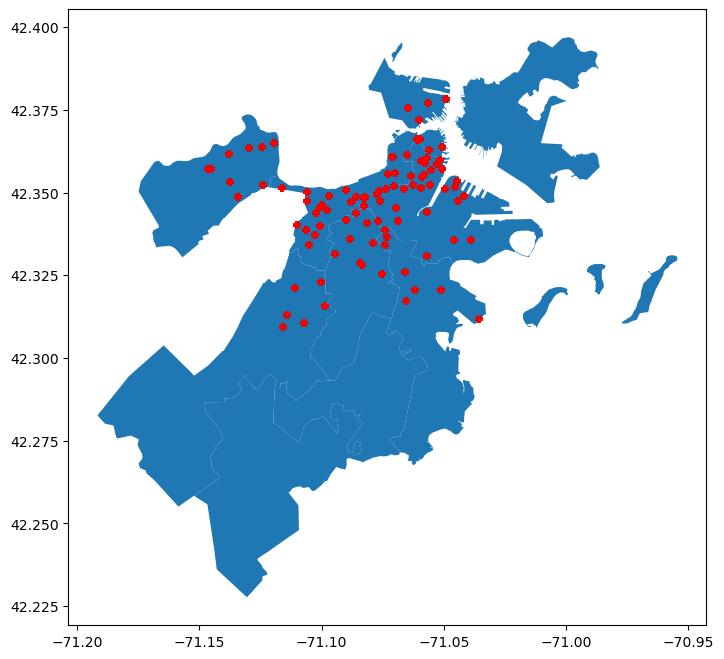

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
boston.plot(ax=ax)
gdf.plot(ax=ax,color='red',marker='+',alpha=.5)